In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

In [2]:
folder = "1nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = f_MAX[2]
reading = Txt_Reading(folder, f_max)

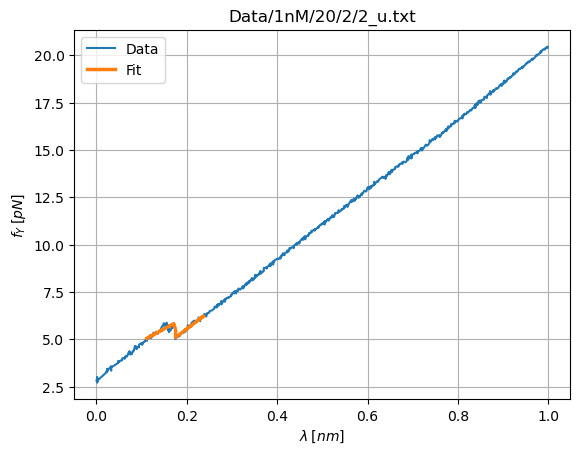

In [3]:
file = reading.readTxt(number=2, N=2, ty='u', graph=True)

In [4]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,5.5248,5.00782,15.672398,45.917319,0.17969,0.175276,12.983536,3.598901,18.230684,1.899537,2


In [5]:
reading.f_rupture, reading.f_rupture_next 

([5.524800000000001], [5.007820000000001])

The break point λ_0 [0.08740815091852812] could be smaller/higher than expected
or the rupture force [3.93598] smaller/higher than expected


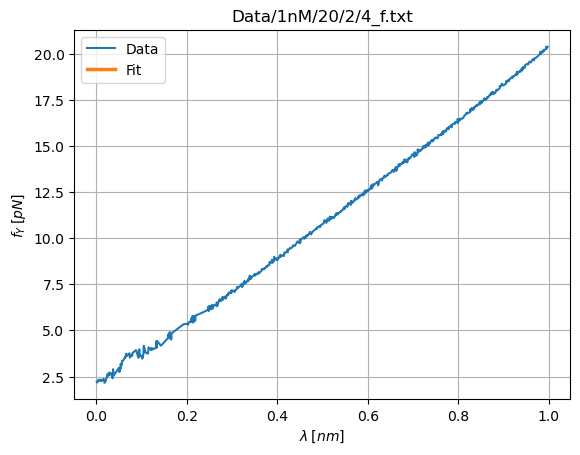

In [6]:
file = reading.readTxt(number=2, N=4, ty='f', graph=True)

In [7]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,0,0,0,0,0.0,0,0,0,0,0,1


In [8]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [9]:
reading.f_rupture, reading.f_rupture_next

([0], [0])

The break point λ_0 [0.09950266874828402] could be smaller/higher than expected
or the rupture force [4.1626199999999995] smaller/higher than expected
Reshape of 10 performed


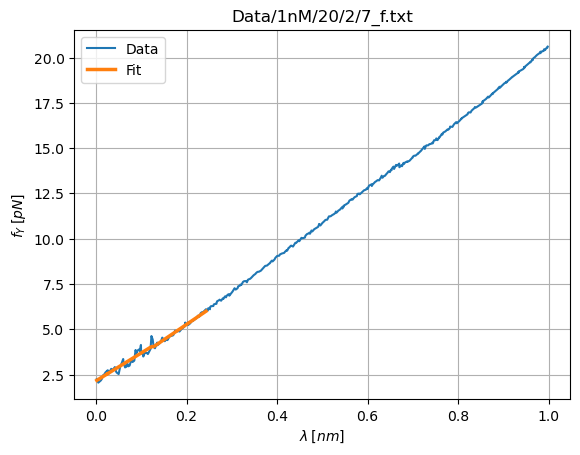

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,4.43058,4.003698,11.387799,36.539143,4.32715,0.125245,15.410085,2.150961,16.924589,1.883978,2


In [10]:
file = reading.readTxt(number=2, N=7, ty='f', graph=True)
reading.params_df

In [11]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

The break point λ_0 [0.10872426346825952] could be smaller/higher than expected
or the rupture force [4.1152] smaller/higher than expected


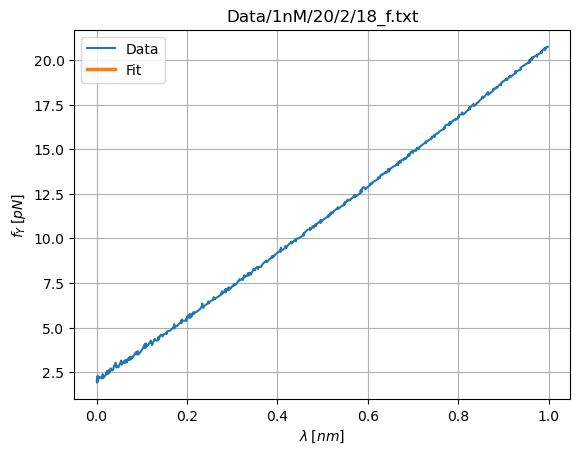

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,0,0,0,0,0.0,0,0,0,0,0,1


In [12]:
file = reading.readTxt(number=2, N=18, ty='f', graph=True)
reading.params_df

In [13]:
molecules, all_molecules_f, all_molecules_u = reading.sequential_analysis()

  0%|          | 0/5 [00:00<?, ?it/s]

Not saving file Data/1nM/20/2/1_f.txt


Not saving file Data/1nM/20/2/10_f.txt


c:\Users\ricta\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Not saving file Data/1nM/20/2/12_f.txt
Not saving file Data/1nM/20/2/23_f.txt
Not saving file Data/1nM/20/2/24_f.txt
Not saving file Data/1nM/20/2/27_f.txt
Not saving file Data/1nM/20/2/42_f.txt
Not saving file Data/1nM/20/2/44_f.txt
Not saving file Data/1nM/20/2/52_f.txt
Not saving file Data/1nM/20/2/11_u.txt
Not saving file Data/1nM/20/2/37_u.txt
Not saving file Data/1nM/20/12/19_f.txt
Not saving file Data/1nM/20/12/20_f.txt
Not saving file Data/1nM/20/12/26_f.txt
Not saving file Data/1nM/20/12/27_f.txt
Not saving file Data/1nM/20/12/28_f.txt
Not saving file Data/1nM/20/12/30_f.txt
Not saving file Data/1nM/20/12/41_f.txt
Not saving file Data/1nM/20/12/46_u.txt
Not saving file Data/1nM/20/18/6_f.txt
Not saving file Data/1nM/20/18/7_f.txt
Not saving file Data/1nM/20/18/11_f.txt
Not saving file Data/1nM/20/18/13_f.txt
Not saving file Data/1nM/20/18/16_f.txt
Not saving file Data/1nM/20/18/18_f.txt
Not saving file Data/1nM/20/18/20_f.txt
Not saving file Data/1nM/20/18/25_f.txt
Not saving 

In [14]:
reading.path, reading.index

('Data/1nM/20/22/51_u.txt', [0])

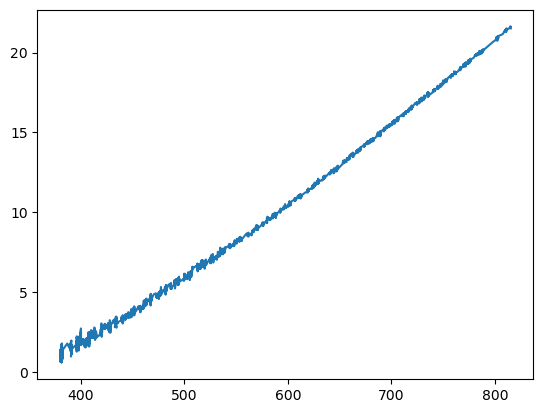

In [15]:
λ = reading.file[1:, -1]
force_Y = np.abs(reading.file[1:, 2])
plt.plot(λ, force_Y);

The break point λ_0 [0.1590290068480043] could be smaller/higher than expected
or the rupture force [4.9616999999999996] smaller/higher than expected
Reshape of 10 performed


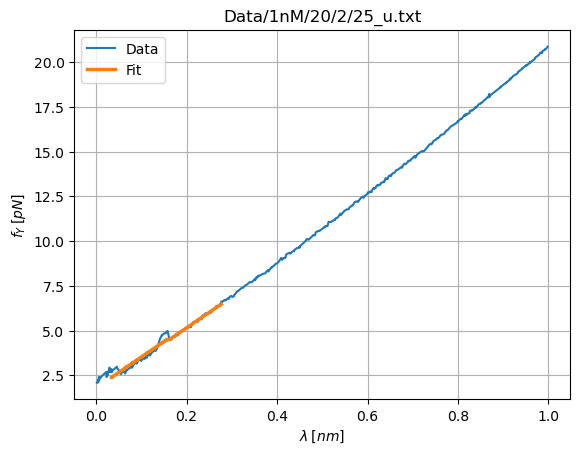

In [16]:
file = reading.readTxt(number=2, N=25, ty='u', graph=True)

In [17]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,4.9806,4.437542,12.575782,38.377962,0.06836,0.158251,17.284514,1.798532,17.216487,1.713023,2


In [18]:
reading.k_eff

0.047765147616666975

In [27]:
tot = 0
for i in all_molecules_f:
    tot += len(i)
tot # total number of experiments performed

178

In [19]:
molecules, all_molecules_f, all_molecules_u

([2, 12, 18, 21, 22],
 [[[[0, 0, 0, 0, 468.4785200000006]],
   [[0, 0, 0, 0, 476.9570399999993]],
   [[0, 0, 0, 0, 485.5322300000007]],
   [[5.80022, 5.40072, 10.599148079881507, 30.49965245953188, 498.03809]],
   [[5.0499600000000004,
     4.41982,
     11.778399124095277,
     35.742710793027385,
     506.52246000000014]],
   [[4.430580000000001,
     4.00369845053908,
     11.387798926056693,
     36.53914334612526,
     515.20118]],
   [[4.821206666666668,
     4.4125564787178275,
     11.640757596802793,
     36.006825881135036,
     523.2763699999996]],
   [[5.08025,
     4.673162559673868,
     10.922213294721058,
     33.06454076927881,
     531.7832099999996]],
   [[0, 0, 0, 0, 610.3398500000003]],
   [[0, 0, 0, 0, 626.0927800000009]],
   [[0, 0, 0, 0, 634.2333999999992]],
   [[0, 0, 0, 0, 641.9863299999997]],
   [[0, 0, 0, 0, 649.9941400000007]],
   [[0, 0, 0, 0, 657.7246099999993]],
   [[0, 0, 0, 0, 665.3662199999999]],
   [[0, 0, 0, 0, 673.0566400000007]],
   [[0, 0, 0, 0, 

In [20]:
# f_max = f_MAX[4]
# colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
#             "#e3b505","#95190c","#610345","#107e7d","#044b7f"]
# markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x"]

# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_f[m])):
#         lab = f'Molecule {m}' if i == 0 else ''
#         f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
#         plt.scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
# plt.grid()
# plt.legend(loc='best')
# plt.title(f'f_MAX = {f_max} -- Fold')
# # plt.xscale('log')
# plt.xlabel('Time [s]')
# plt.ylabel('$f_{rupture} \\:[pN]$')
# plt.show()

In [21]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

The images directory is created...


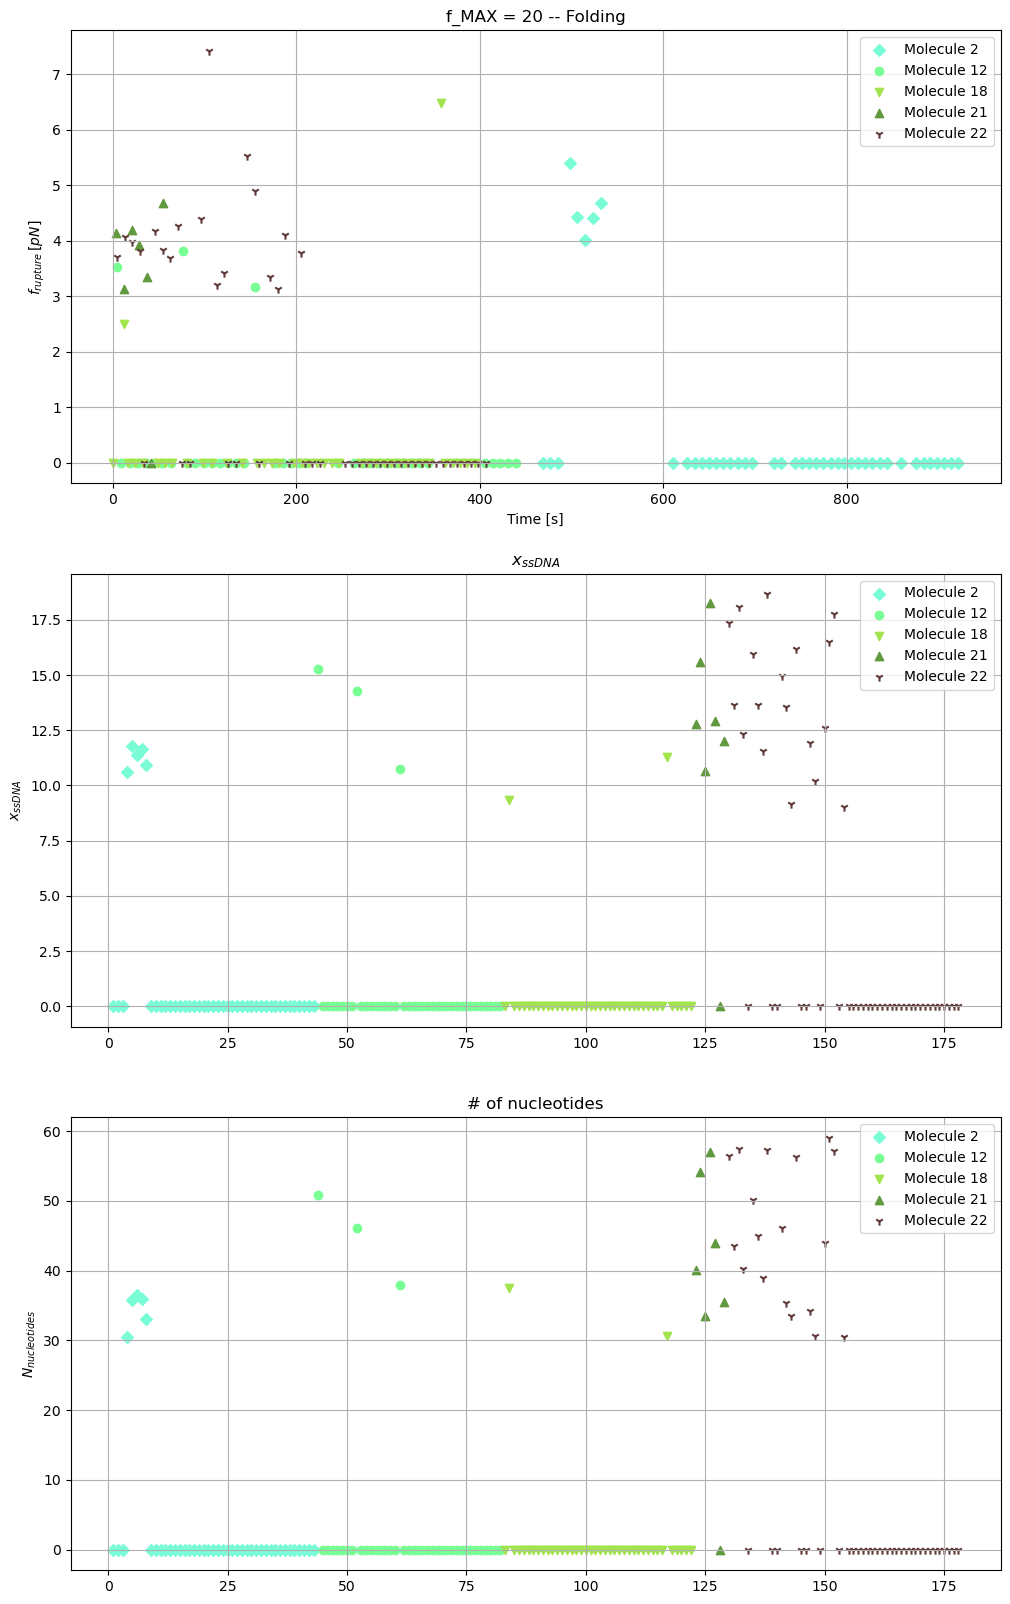

In [22]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

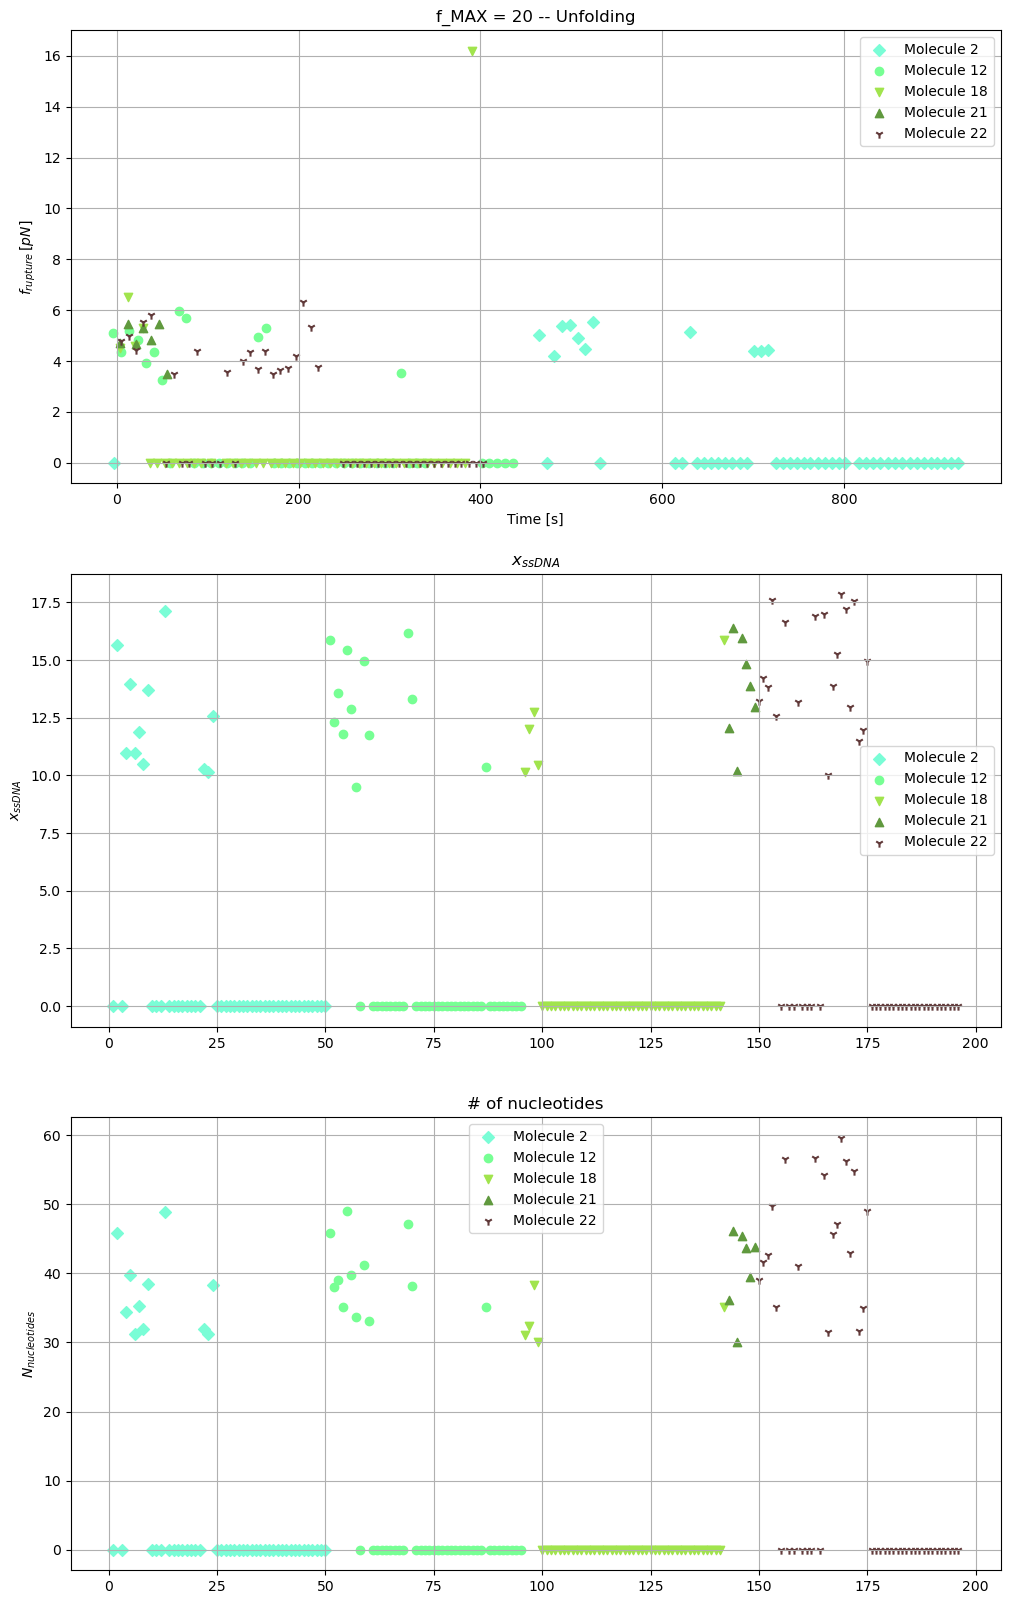

In [23]:
fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_u[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# Plots per single molecule

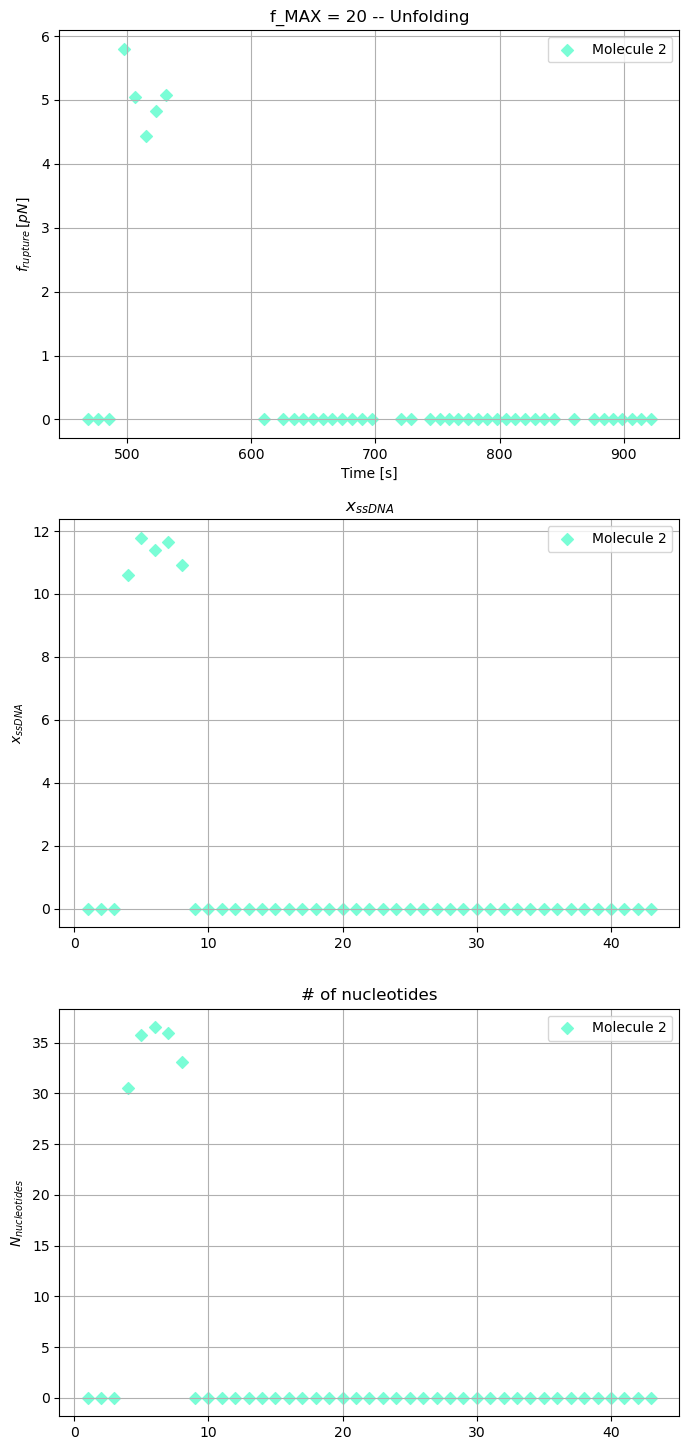

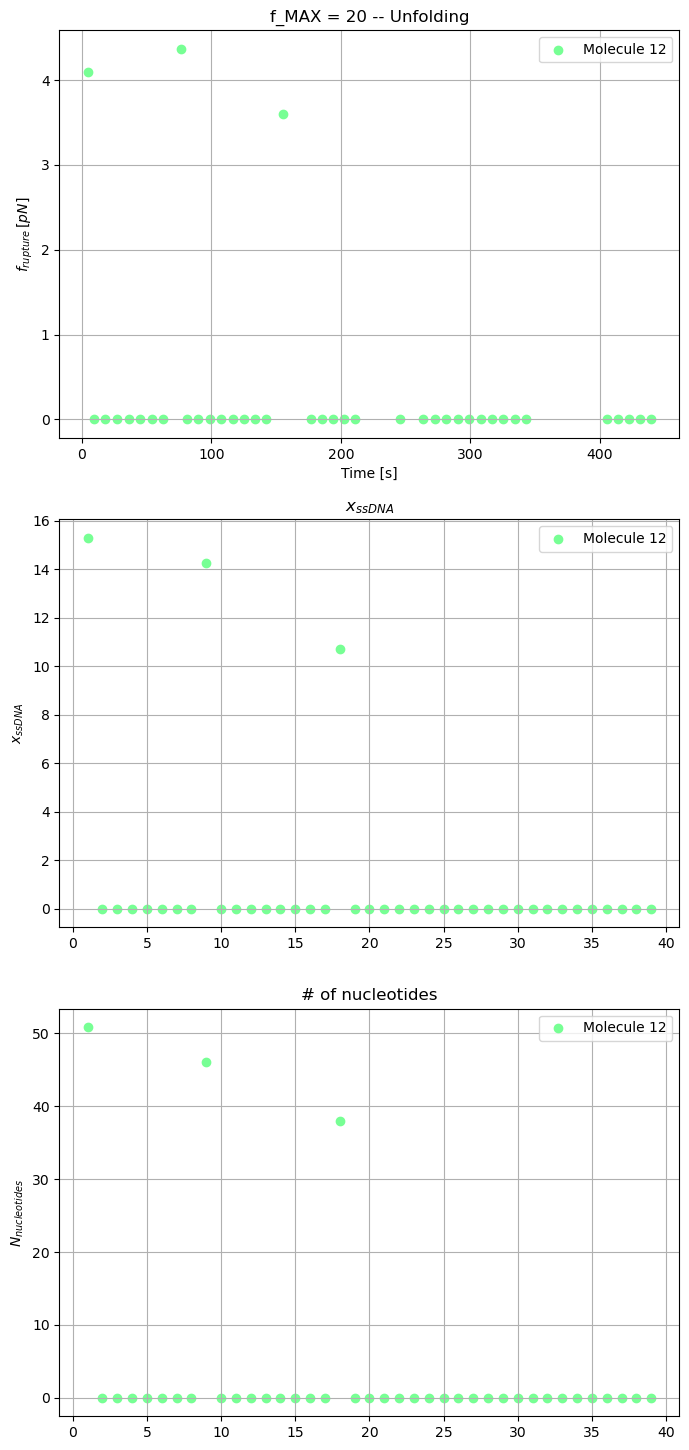

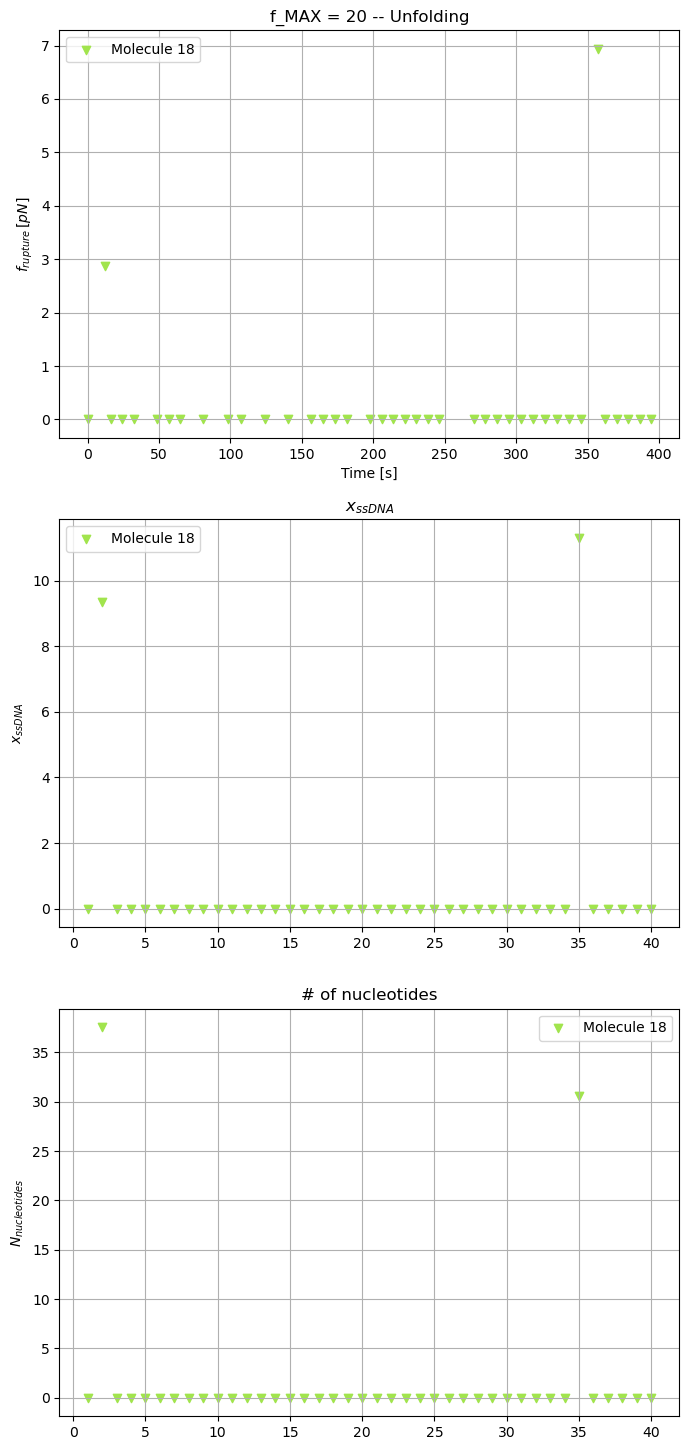

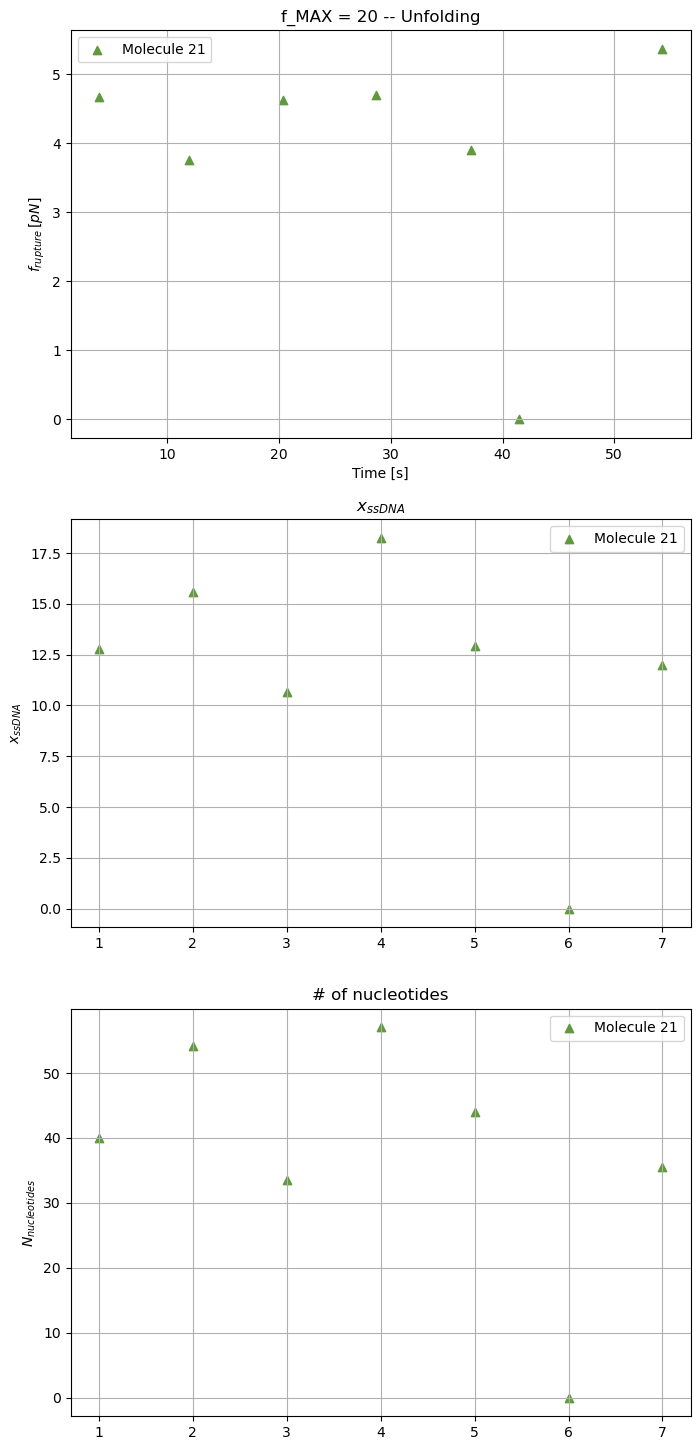

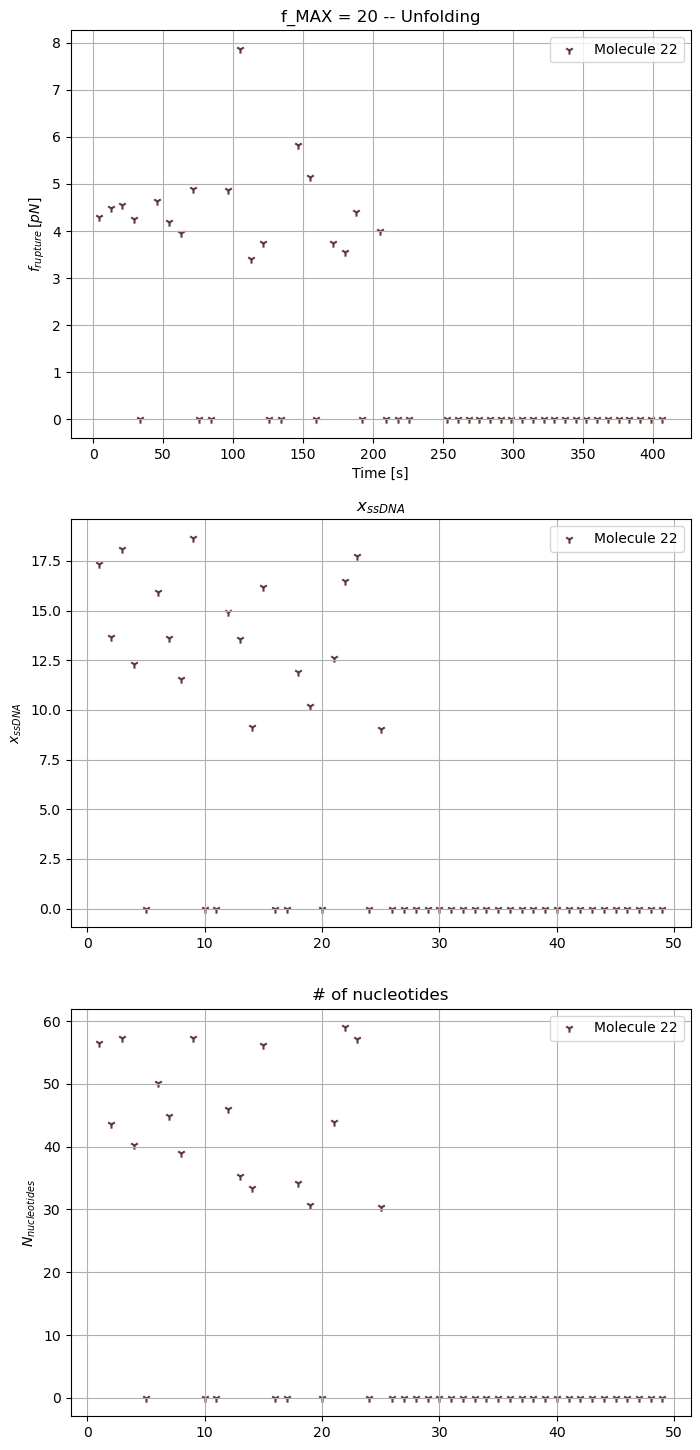

In [25]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_f[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()

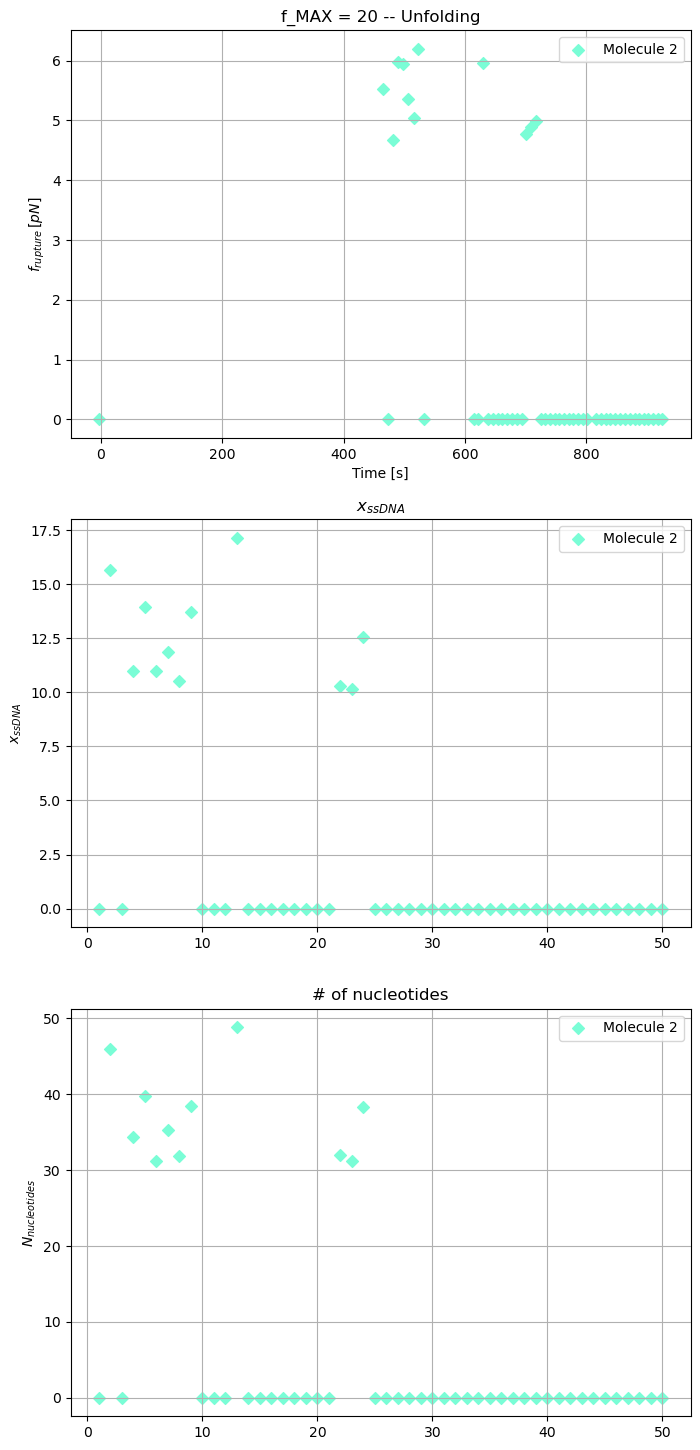

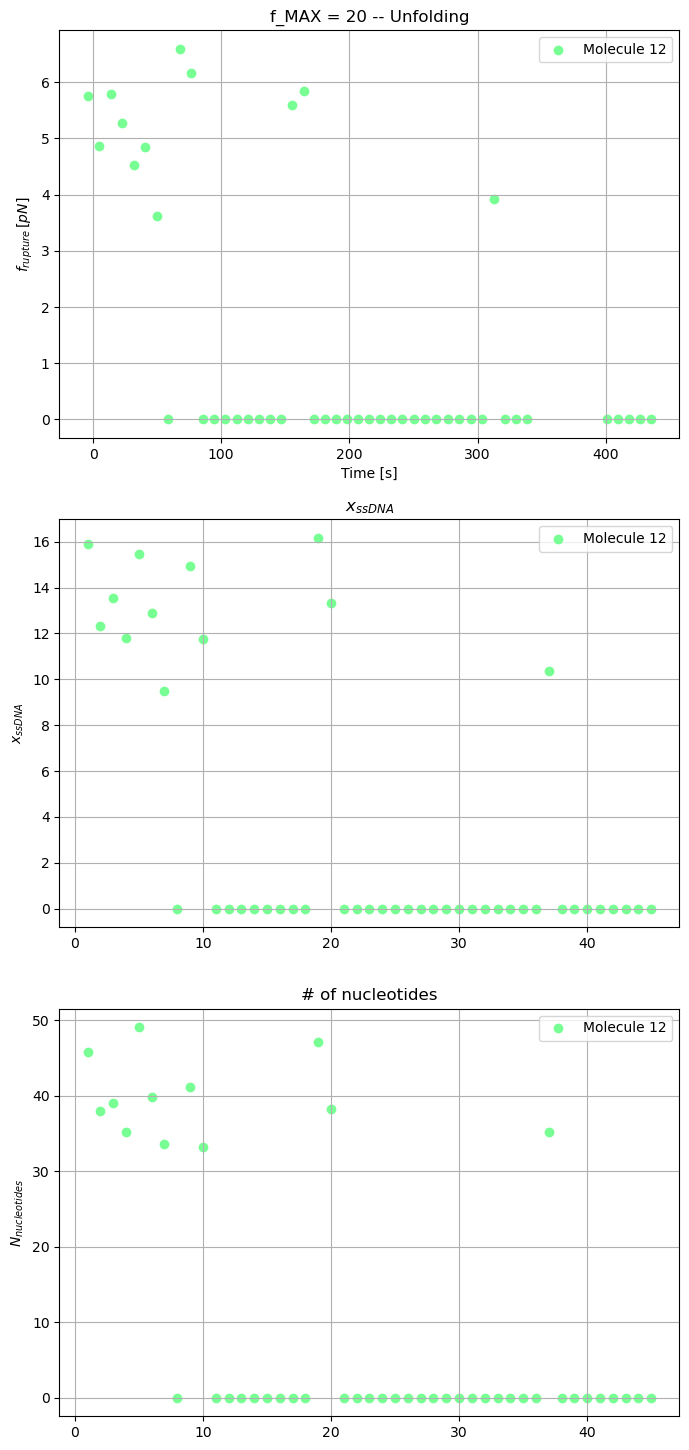

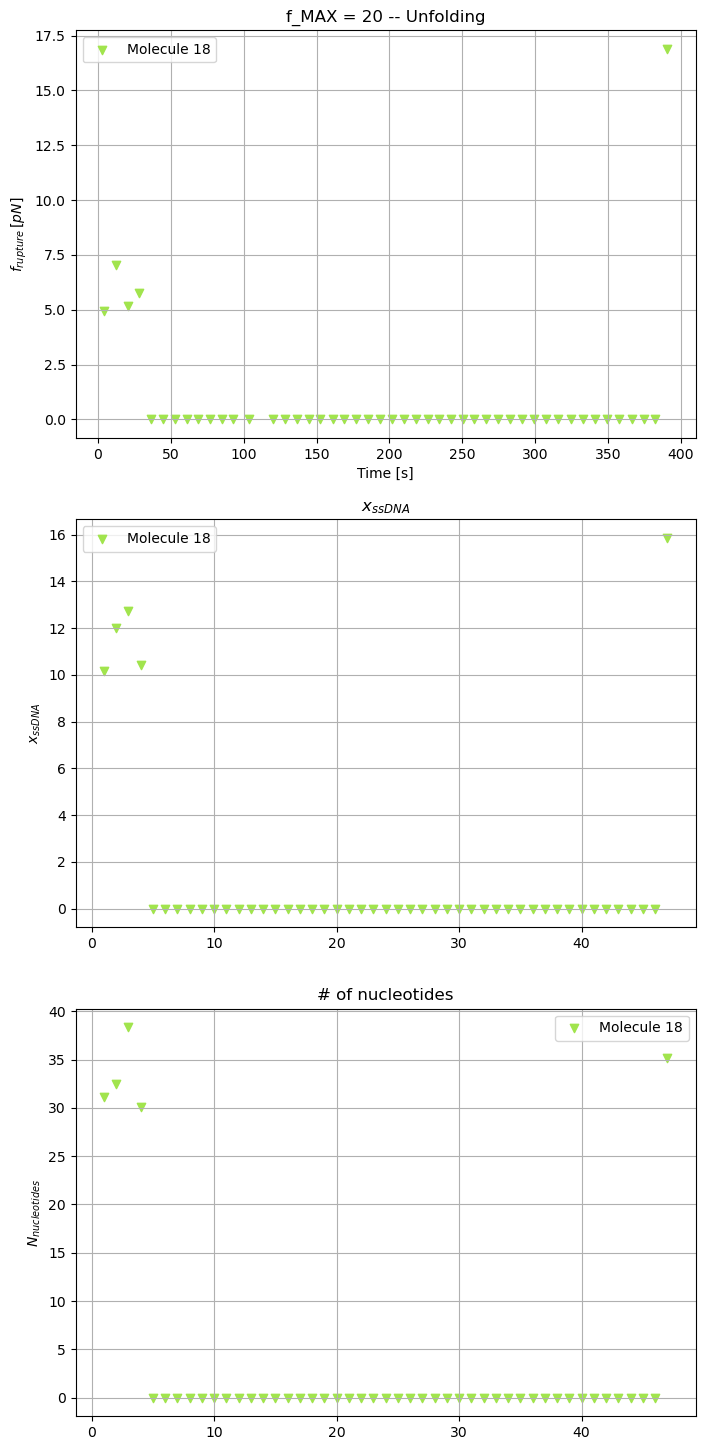

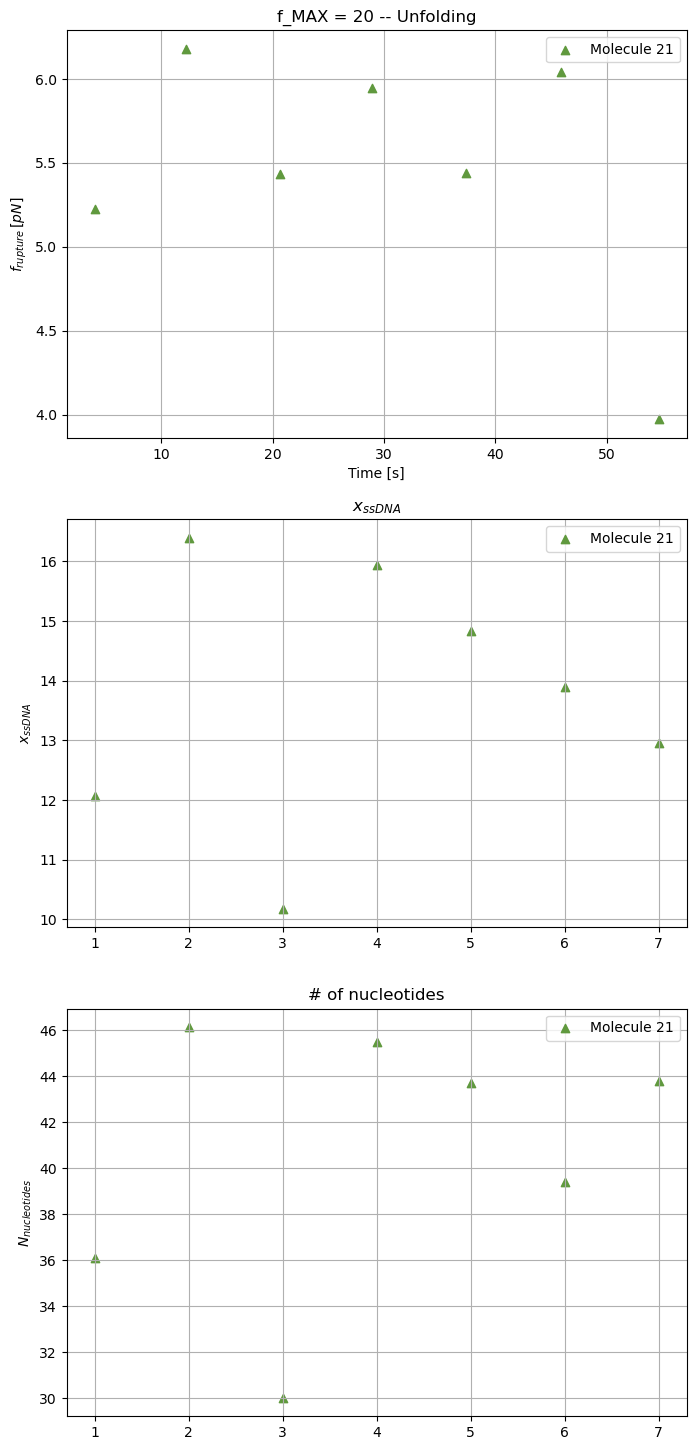

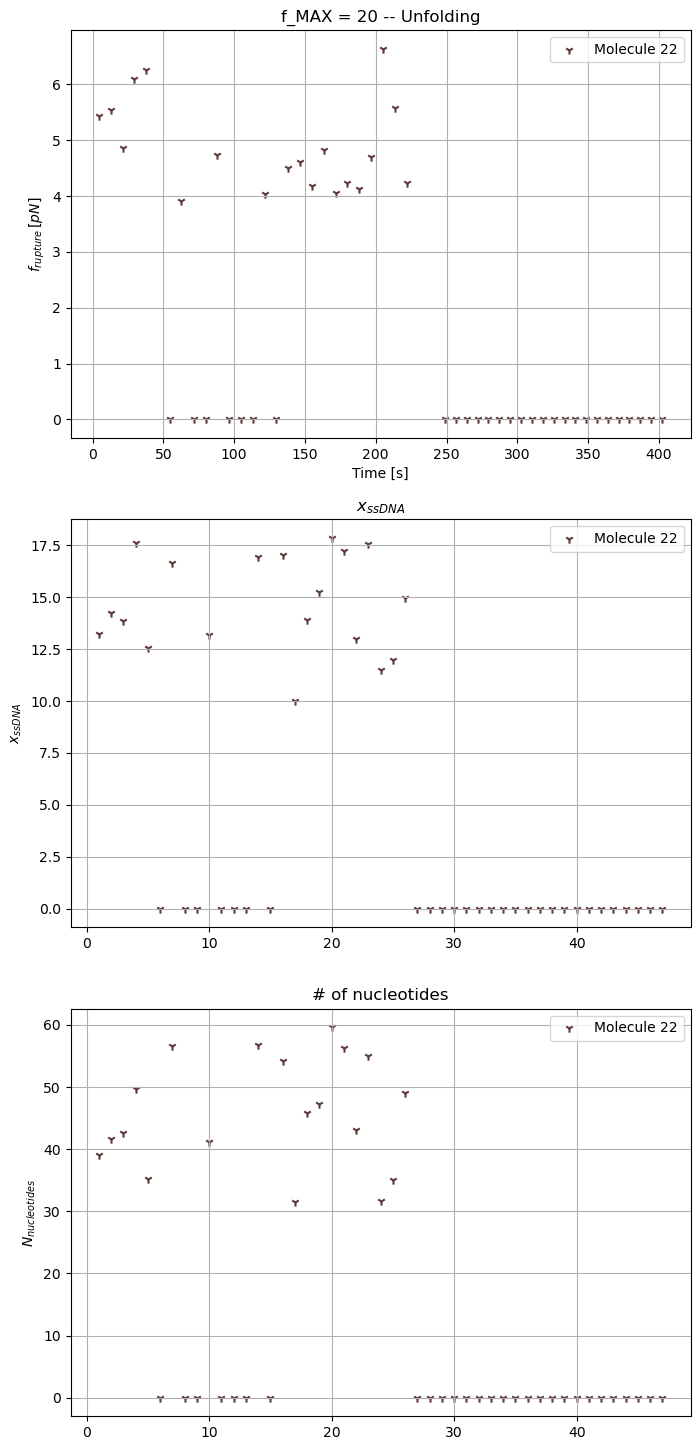

In [26]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()